In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## LIBRARIES:

In [ ]:
import numpy as np
import pandas as pd

from PIL import Image
from IPython.display import display

import os

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

from progressbar import ProgressBar

import matplotlib.pyplot as plt
from matplotlib import style, gridspec
plt.style.use('seaborn-whitegrid')

***

# PATHS:

In [ ]:
data_path = 'gdrive/My Drive/1_PROJECTS/2_APPAREL_RECOMMENDATION/DATA/'
img_path = data_path + '16k_images/'

# A.DATA:

In [ ]:
df = pd.read_csv(data_path + 'df_amazon.csv', index_col = 0, )
df = df.replace('unknown', '').fillna('')
df.sample(10)

,img,title,item,brand,color
100856,B0722FN8K2.jpeg,lacoste women s women s pink long sleeve shirt...,shirt,lacoste,6ft teck/frangipane-tou
41368,B0728FMVY7.jpeg,new chalet et ceci gracy tunic sea foam size s xl,shirt,chalet et ceci,
58898,B01MRPHCB7.jpeg,betusline women winter long sleeve lace floral...,shirt,betusline women clothes,
124599,B01M69FAIY.jpeg,lovegiftto lady womens chelsea f c sport footb...,shirt,lovegiftto lady,
82899,B01MR38J7J.jpeg,saianke women cotton knitted color long sleeve...,shirt,saianke,yellow
47923,B071JXF9HM.jpeg,tifenny women flower embroidered sleeveless ve...,dress,tifenny,dark blue
23396,B01N5P5UEP.jpeg,golden goose women s mcbi139019o white cotton ...,shirt,golden goose,white
47749,B0716X1GH1.jpeg,melissa mccarthy seven7 women s plus size d ri...,shirt,melissa mccarthy seven7,
85089,B01BPDT95C.jpeg,somedays lovin moody embroidered bralette blue,shirt,somedays lovin,blue
107081,B01MQWYY09.jpeg,carnage cletus kasady graphic t shirt,orca shirt,marvel,


In [ ]:
df.shape

(175913, 5)

## 1.COMBINE ALL TEXT COLUMNS AND REMOVE REPEATING WORDS:

In [ ]:
def fn_set(row):
    row = str(row)
    listO_words = row.split()
    setO_words = set(listO_words)
    row = ' '.join(list(setO_words))
    return row


In [ ]:
setO_brands = set(df.brand)
setO_colors = set(df.color)
setO_prod_type = set(df.item)

len(setO_brands), len(setO_colors), len(setO_prod_type)

(10274, 7007, 72)

In [ ]:
df_text_vectorize = pd.DataFrame().assign(img = df.img, text = df.title + ' ' +  df.brand +  '  ' + df.color +  '  ' + df.item)

df_text_vectorize.text = df_text_vectorize.text.apply(fn_set)
df_text_vectorize.head()

,img,text
0,B016I2TS4W.jpeg,shirt como superheroes neck for t ironman mini...
1,B01N49AI08.jpeg,shirt izo clothing tunic womens fig
2,B01JDPCOHO.jpeg,won shirt fig clothing womens top
3,B01N19U5H5.jpeg,girl shirt harajuku bubble mori casual collar ...
4,B004GSI2OS.jpeg,shirt tapered black/ resistant twill featherli...


***

# B.IMAGE ENCODING:

### 1.INDEXES OF ONLY AVAILABLE IMAGES:

In [ ]:
def get_all_file_paths(directory):

    # initializing empty file paths list
    file_paths = []

    # crawling through directory and subdirectories
    for root, directories, files in os.walk(directory):
        for filename in files:
            # join the two strings in order to form the full filepath.
            filepath = os.path.join(root, filename).replace("\\",'/')
            file_paths.append(filepath)

    # returning all file paths
    return file_paths

def retrn_arryO_valid_idxs(listO_available_imgs, listO_all_imgs):

    image_names = [os.path.basename(path) for path in listO_available_imgs]

    listO_valid_idxs = []

    pbar = ProgressBar()
    for img_file_name in pbar(image_names):

        try:
            idx = listO_all_imgs.index(img_file_name)
            listO_valid_idxs.append(idx)
        except:
            pass

    arryO_valid_idxs = np.array(listO_valid_idxs)
    return arryO_valid_idxs

def retrn_arryO_valid_idxs(listO_available_imgs, listO_all_imgs):

    image_names = [os.path.basename(path) for path in listO_available_imgs]

    listO_valid_idxs = []

    pbar = ProgressBar()
    for img_file_name in pbar(image_names):

        try:
            idx = listO_all_imgs.index(img_file_name)
            listO_valid_idxs.append(idx)
        except:
            pass

    arryO_valid_idxs = np.array(listO_valid_idxs)
    return arryO_valid_idxs

In [ ]:
listO_available_imgs = get_all_file_paths(img_path)
listO_all_imgs = list(df.img.values)

arryO_valid_idxs = retrn_arryO_valid_idxs(listO_available_imgs, listO_all_imgs)
len(arryO_valid_idxs)

100% (12161 of 12161) |##################| Elapsed Time: 0:00:18 Time:  0:00:18


11879

In [ ]:
np.save(data_path + 'arryO_valid_idxs.npy', arryO_valid_idxs)


In [ ]:
arryO_valid_idxs = np.load(data_path + 'arryO_valid_idxs.npy')

### 2.IMAGE SAMPLES:

In [ ]:
def fn_show_images(listO_imgs, img_path):

    imgs = [Image.open(img_path + img).resize((224, 224)) for img in listO_imgs]
    fig, axes = plt.subplots(1, 6, figsize=(20, 17))

    for idx, img in enumerate(imgs):
        axes[idx].imshow(img)


ERROR! Session/line number was not unique in database. History logging moved to new session 60


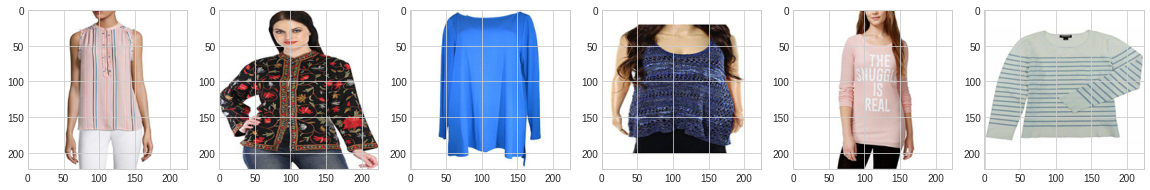

In [ ]:
listO_imgs = df_text_vectorize.iloc[arryO_valid_idxs].img.sample(6)

fn_show_images(listO_imgs, img_path)

#### IMAGE SHAPE:


In [ ]:
def fn_img_shape(idx):
    img = Image.open(img_path + df_text_vectorize.iloc[arryO_valid_idxs[900]].img)
    img_arry_shape = np.asarray(img, dtype = 'uint8').shape
    return img_arry_shape

In [ ]:
[fn_img_shape(i) for i in [111, 222, 777, 8888, 0, 12]]

[(500, 482, 3),
 (500, 482, 3),
 (500, 482, 3),
 (500, 482, 3),
 (500, 482, 3),
 (500, 482, 3)]

- IMAGE STRUCTURE IS NOT CONSISTENT
- THEREFORE IMAGE SIMILARITY NEED NOT NECESSARILY MEAN CLOTHING SIMILARITY


### 3.FN TO CREATE ARRAY OF ALL IMAGE ARRAYS:

In [ ]:
def fn_create_arryO_all_img_arrys(arryO_img_names, img_path):

    listO_img_arrys = []
    pbar = ProgressBar()
    for img_name in pbar(arryO_img_names):

        img = Image.open(img_path + img_name).convert('L').resize((224, 224))
        img_arry = np.asarray(img, dtype = 'uint8')
        listO_img_arrys.append(img_arry)

        arryO_img_arrys = np.array(listO_img_arrys)

    return arryO_img_arrys

In [ ]:
arryO_img_names = df_apparel_imgs.img.values

arryO_imgs = fn_create_arryO_all_img_arrys(arryO_img_names, img_path)

arryO_imgs.shape

100% (11879 of 11879) |##################| Elapsed Time: 1:40:25 Time:  1:40:25


(11879, 224, 224)

In [ ]:
# np.save(data_path + 'arryO_imgs.npy', arryO_imgs)

### 4.IMAGES DIMENSIONALITY REDUCTION:

In [ ]:
data_path = 'gdrive/My Drive/1_PROJECTS/2_APPAREL_RECOMMENDATION/DATA/'

%time arryO_imgs = np.load(data_path + 'arryO_imgs.npy')

CPU times: user 201 ms, sys: 3.71 s, total: 3.91 s
Wall time: 2min 11s


In [ ]:
arryO_imgs = arryO_imgs.reshape(11879, 224 * 224)/255.0 #--------- NORMALIZE

svd = TruncatedSVD(500)
%time arryO_encoded_images = svd.fit_transform(arryO_imgs)

arryO_encoded_images.shape

CPU times: user 7min 55s, sys: 12.4 s, total: 8min 7s
Wall time: 4min 14s


(11879, 500)

In [ ]:
arryO_encoded_images.shape

(11879, 500)

In [ ]:
# np.save(data_path + 'arryO_encoded_images.npy', arryO_encoded_images)

# C. TEXT ENCODING:

## 1.BOWs:

In [ ]:
corpus = df_text_vectorize.text.values

BOW_vectorizer = CountVectorizer(min_df=1).fit(corpus)
bow_matrix = BOW_vectorizer.transform(corpus)

bow_matrix.shape

(175913, 43019)

In [ ]:
bow_features = np.array(BOW_vectorizer.get_feature_names())
idxs_imp_words = np.asarray(bow_matrix.sum(axis = 0)).ravel().argsort()[::-1]

bow_features[idxs_imp_words][:50]

array(['shirt', 'women', 'top', 'sleeve', 'blouse', 'neck', 'womens',
       'long', 'tank', 'tops', 'black', 'short', 'casual', 'tee', 'white',
       'size', 'shirts', 'shoulder', 'print', 'tunic', 'lace',
       'sleeveless', 'plus', 'loose', 'cotton', 'ladies', 'blue', 'and',
       'sexy', 'with', 'fashion', 'chiffon', 'floral', 'button', 'summer',
       'printed', 'off', 'the', 'crop', 'apparel', 'vest', 'solid', 'for',
       'in', 'dress', 'down', 'red', 'fit', 'up', 'pink'], dtype='<U51')

### TOP 5000 BOW:

In [ ]:
bow_matrix_imp_sorted = bow_matrix[:, idxs_imp_words[:5000]]

bow_matrix_imp_sorted.shape

(175913, 5000)

### DIMENSIONALITY REDUCTION BOW:

In [ ]:
svd = TruncatedSVD(500)
%time dim_reduced_bow_matrix = svd.fit_transform(bow_matrix_imp_sorted)

dim_reduced_bow_matrix.shape

CPU times: user 1min 11s, sys: 5.45 s, total: 1min 16s
Wall time: 53.6 s


(175913, 500)

In [ ]:
# np.save(data_path + 'dim_reduced_bow_matrix.npy', dim_reduced_bow_matrix)

## 2.TFIDF:

In [ ]:
corpus = df_text_vectorize.text.values

TFIDF_vectorizer = TfidfVectorizer(min_df=1).fit(corpus)
tfidf_matrix = TFIDF_vectorizer.transform(corpus)

tfidf_matrix.shape

(175913, 43019)

In [ ]:
tfidf_features = np.array(TFIDF_vectorizer.get_feature_names())
idxs_imp_words = np.asarray(tfidf_matrix.sum(axis = 0)).ravel().argsort()[::-1]

tfidf_features[idxs_imp_words][:50]

array(['shirt', 'women', 'top', 'sleeve', 'blouse', 'neck', 'long',
       'womens', 'tank', 'tops', 'black', 'casual', 'short', 'white',
       'tee', 'size', 'shoulder', 'lace', 'shirts', 'print', 'sleeveless',
       'tunic', 'loose', 'plus', 'cotton', 'chiffon', 'floral', 'sexy',
       'button', 'off', 'ladies', 'blue', 'fashion', 'summer', 'printed',
       'with', 'crop', 'and', 'solid', 'the', 'apparel', 'vest', 'down',
       'dress', 'in', 'fit', 'for', 'up', 'red', 'sleeves'], dtype='<U51')

### TOP 5000 TFIDF:

In [ ]:
tfidf_matrix_imp_sorted = tfidf_matrix[:, idxs_imp_words[:5000]]

tfidf_matrix_imp_sorted.shape

(175913, 5000)

### DIMENSIONALITY REDUCTION TFIDF:

In [ ]:
svd = TruncatedSVD(500)
%time dim_reduced_tfidf_matrix = svd.fit_transform(tfidf_matrix_imp_sorted)

dim_reduced_tfidf_matrix.shape

CPU times: user 1min 7s, sys: 5.22 s, total: 1min 13s
Wall time: 51 s


(175913, 500)

In [ ]:
# np.save(data_path + 'dim_reduced_tfidf_matrix.npy', dim_reduced_tfidf_matrix)